# 1. EDA on 4 stocks of interest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("bmh")
import pandas_datareader as pdr
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [2]:
stocks_of_interest = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

for stock in stocks_of_interest:   
    globals()[stock] = pdr.DataReader(stock, 'stooq', start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for c, cn in zip(company_list, company_name):
    c["company_name"] = cn

AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2021-08-03 to 2018-08-03
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          755 non-null    float64
 1   High          755 non-null    float64
 2   Low           755 non-null    float64
 3   Close         755 non-null    float64
 4   Volume        755 non-null    int64  
 5   company_name  755 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 41.3+ KB


In [3]:
def visualize_data(parameter_of_interest):
    for i, company in enumerate(company_list, 1):
        plt.subplot(2, 2, i)
        company[str(parameter_of_interest)].plot()
        plt.ylabel(str(parameter_of_interest))
        plt.xlabel(None)
        plt.title(f"{str(parameter_of_interest)} of {stocks_of_interest[i - 1]}")

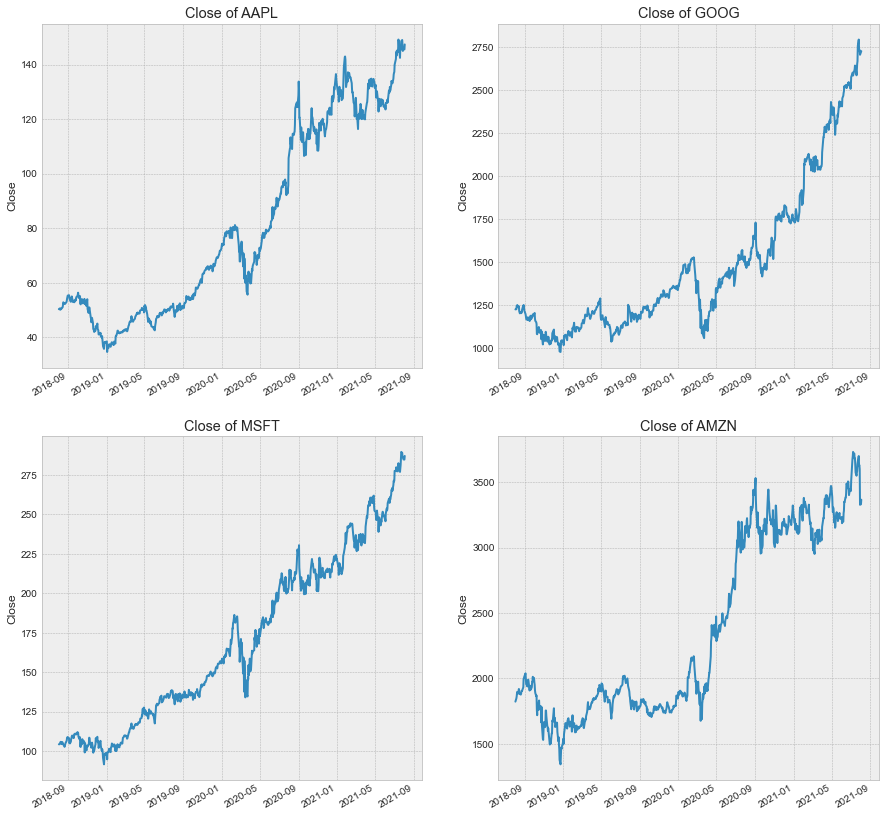

In [4]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

visualize_data("Close")
    
plt.show()

#### Trading Volume

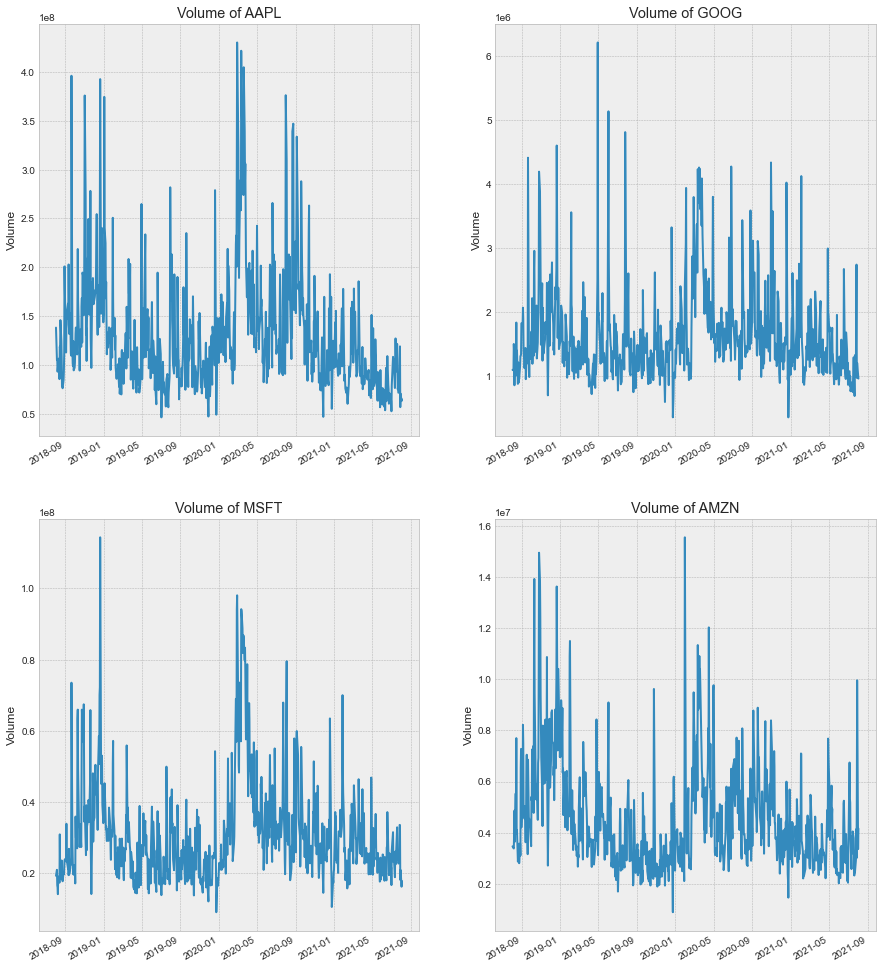

In [5]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

visualize_data("Volume")
    
plt.show()

# 2. SMA (Simple Moving Average)

In [6]:
moving_averages = [20, 50, 200]

for ma in moving_averages:
    for company in company_list:
        column_name = f"{ma} Moving average"
        company[column_name] = company['Close'].rolling(window=ma, min_periods=1).mean()

In [7]:
AMZN.head()

,Open,High,Low,Close,Volume,company_name,20 Moving average,50 Moving average,200 Moving average
Date,,,,,,,,,
2021-08-03,3340.72,3391.0000,3299.77,3366.24,4157343,AMAZON,3366.2400,3366.2400,3366.2400
2021-08-02,3353.10,3358.9200,3317.00,3331.48,3353915,AMAZON,3348.8600,3348.8600,3348.8600
2021-07-30,3347.95,3368.1400,3306.98,3327.59,9965593,AMAZON,3341.7700,3341.7700,3341.7700
2021-07-29,3627.75,3637.9500,3580.01,3599.92,5519952,AMAZON,3406.3075,3406.3075,3406.3075
2021-07-28,3633.78,3658.4204,3601.00,3630.32,2999378,AMAZON,3451.1100,3451.1100,3451.1100


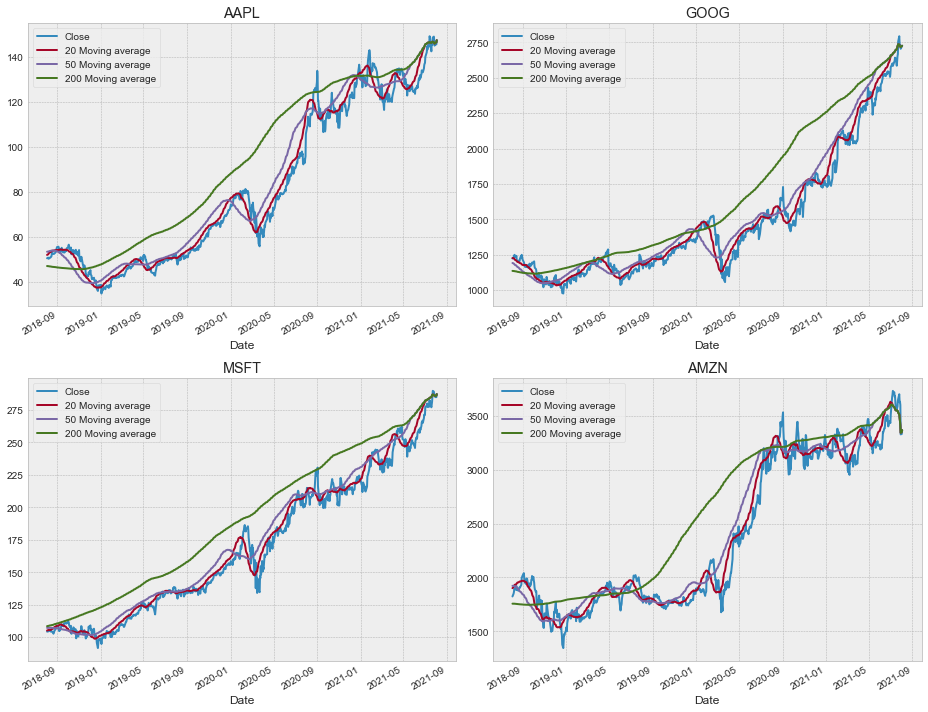

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(13)

# for x in company_list:
#     x[['Close', '20 Moving average', '50 Moving average', '200 Moving average']].plot(ax=axes[0,0])
#     axes[0,0].set_title(f"{x}")

AMZN[['Close', '20 Moving average', '50 Moving average', '200 Moving average']].plot(ax=axes[1,1])
axes[1,1].set_title('AMZN')
AAPL[['Close', '20 Moving average', '50 Moving average', '200 Moving average']].plot(ax=axes[0,0])
axes[0,0].set_title('AAPL')
GOOG[['Close', '20 Moving average', '50 Moving average', '200 Moving average']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOG')
MSFT[['Close', '20 Moving average', '50 Moving average', '200 Moving average']].plot(ax=axes[1,0])
axes[1,0].set_title('MSFT')

fig.tight_layout()

# 3. Risk analysis: Daily Returns

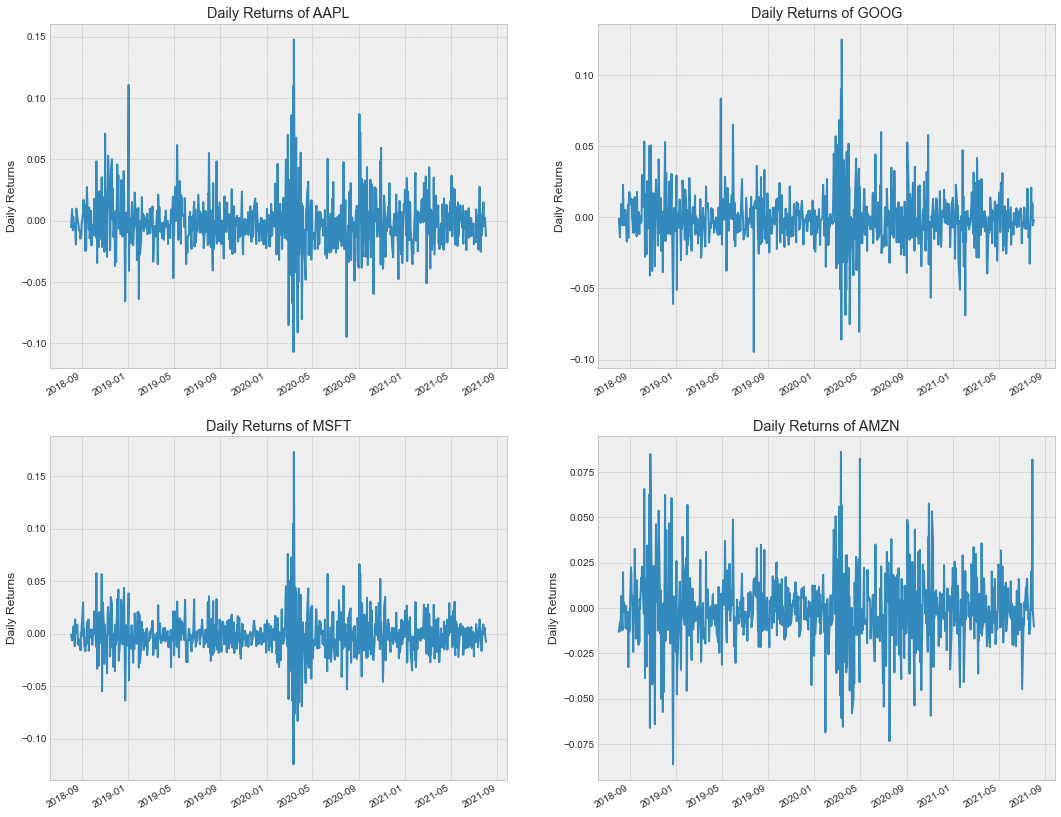

In [9]:
for c in company_list:
    c['Daily Returns'] = c['Close'].pct_change()

plt.figure(figsize=(18, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

visualize_data("Daily Returns")

plt.show()

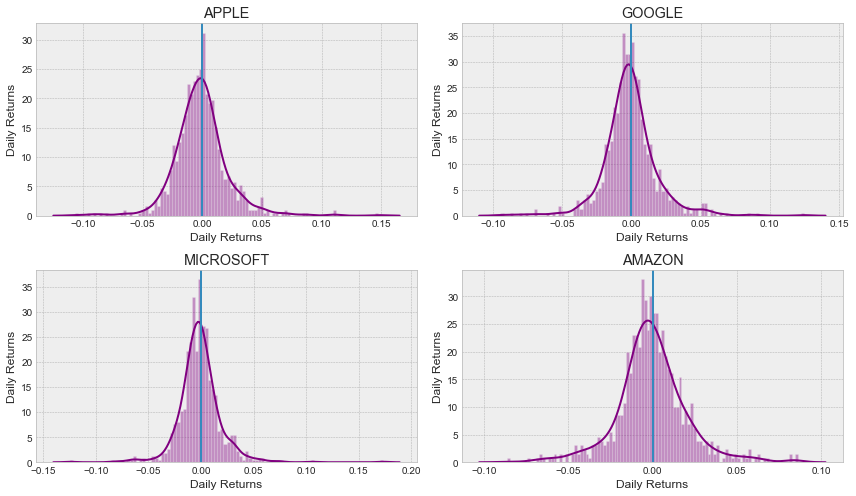

In [10]:
plt.figure(figsize=(12, 7))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Returns'], bins=100, color='purple')
    plt.ylabel('Daily Returns')
    plt.axvline(x=0)
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()

# 4. Correlation analysis in stocks closing prices

In [11]:
closing_df = pdr.DataReader(stocks_of_interest, 'stooq', start, end)['Close']
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-03,147.36,2725.60,287.12,3366.24
2021-08-02,145.52,2719.79,284.82,3331.48
2021-07-30,145.86,2704.42,284.91,3327.59
2021-07-29,145.64,2730.81,286.50,3599.92
2021-07-28,144.98,2727.63,286.22,3630.32


In [12]:
closing_df_returns = closing_df.pct_change().dropna()
closing_df_returns.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-02,-0.012486,-0.002132,-0.008011,-0.010326
2021-07-30,0.002336,-0.005651,0.000316,-0.001168
2021-07-29,-0.001508,0.009758,0.005581,0.081840
2021-07-28,-0.004532,-0.001164,-0.000977,0.008445
2021-07-27,0.012347,0.003043,0.001118,-0.001083


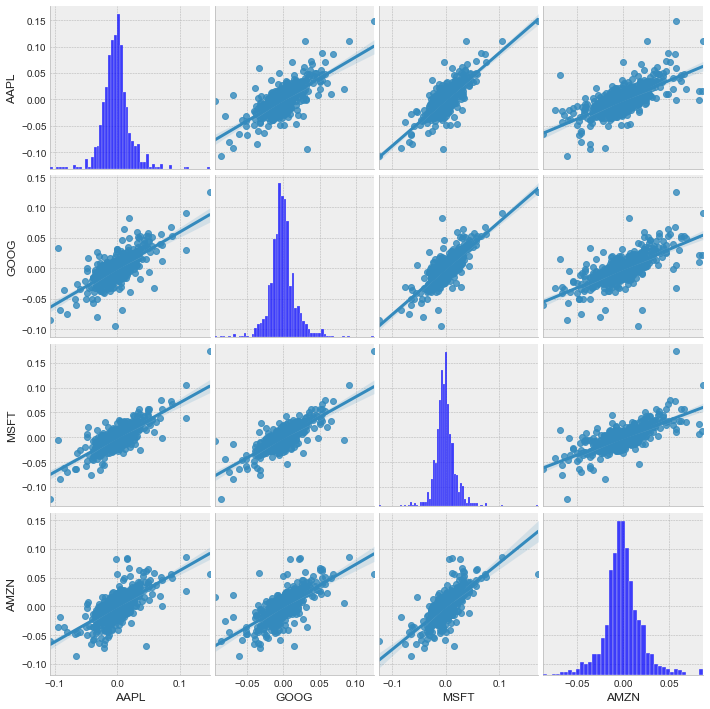

In [13]:
sns.pairplot(closing_df_returns, kind='reg')

Correlation plot between returns

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

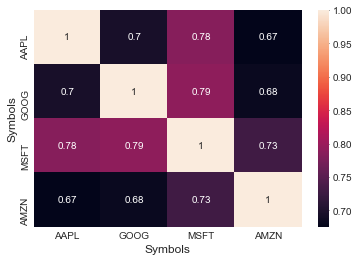

In [14]:
sns.heatmap(closing_df_returns.corr(), annot=True)

Correlation plot between closing prices

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

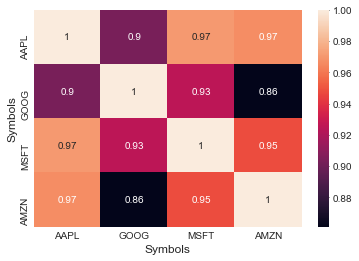

In [15]:
sns.heatmap(closing_df.corr(), annot=True)

## 5a. ARIMA Predictions on AMZN stock, starting at Jan 1, 2012

In [48]:
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [49]:
# p is the number of lag observations.
# d is the degree of differencing.
# q is the size/width of the moving average window.

In [50]:
AMZN = pdr.DataReader('AMZN', data_source='stooq', start='2012-01-01', end="2021-07-30")

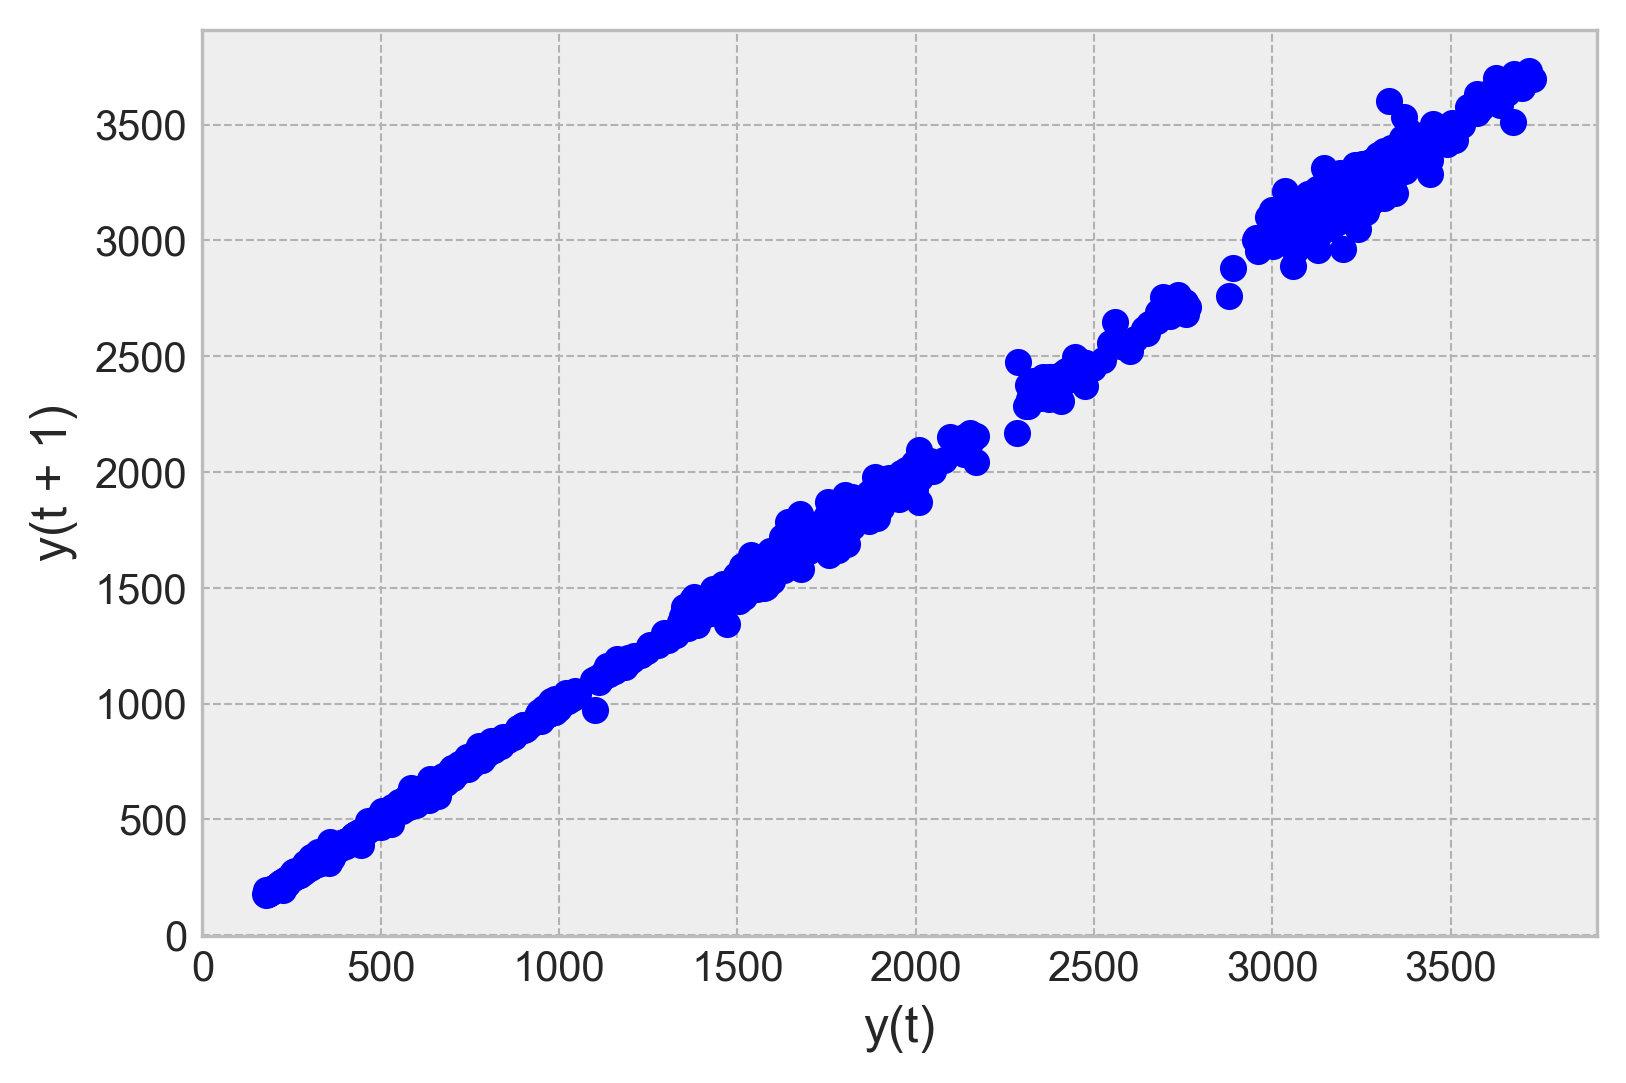

In [68]:
lag_plot(AMZN['Close'])
plt.show()

ARIMA will work, since there is auto-correlation in the data

In [52]:
train_data, test_data = AMZN[:int(len(AMZN)*0.7)], AMZN[int(len(AMZN)*0.7):]
print(len(train_data))
print(len(test_data))

1687
723


In [53]:
training_data = train_data['Close'].values
test_data = test_data['Close'].values
old_prices = [x for x in training_data]
model_predictions = []
num_obs = len(test_data)
# Model
for time_point in range(num_obs):
    # 4 lag observation
    # 1 degree of differencing
    # 1 size/width of the moving average window
    model = ARIMA(old_prices, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    old_prices.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)

C:\Users\Daniel\miniconda3\envs\571\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [54]:
print(f'Testing Mean Squared Error is: {MSE_error}')

Testing Mean Squared Error is: 33.291477229541634


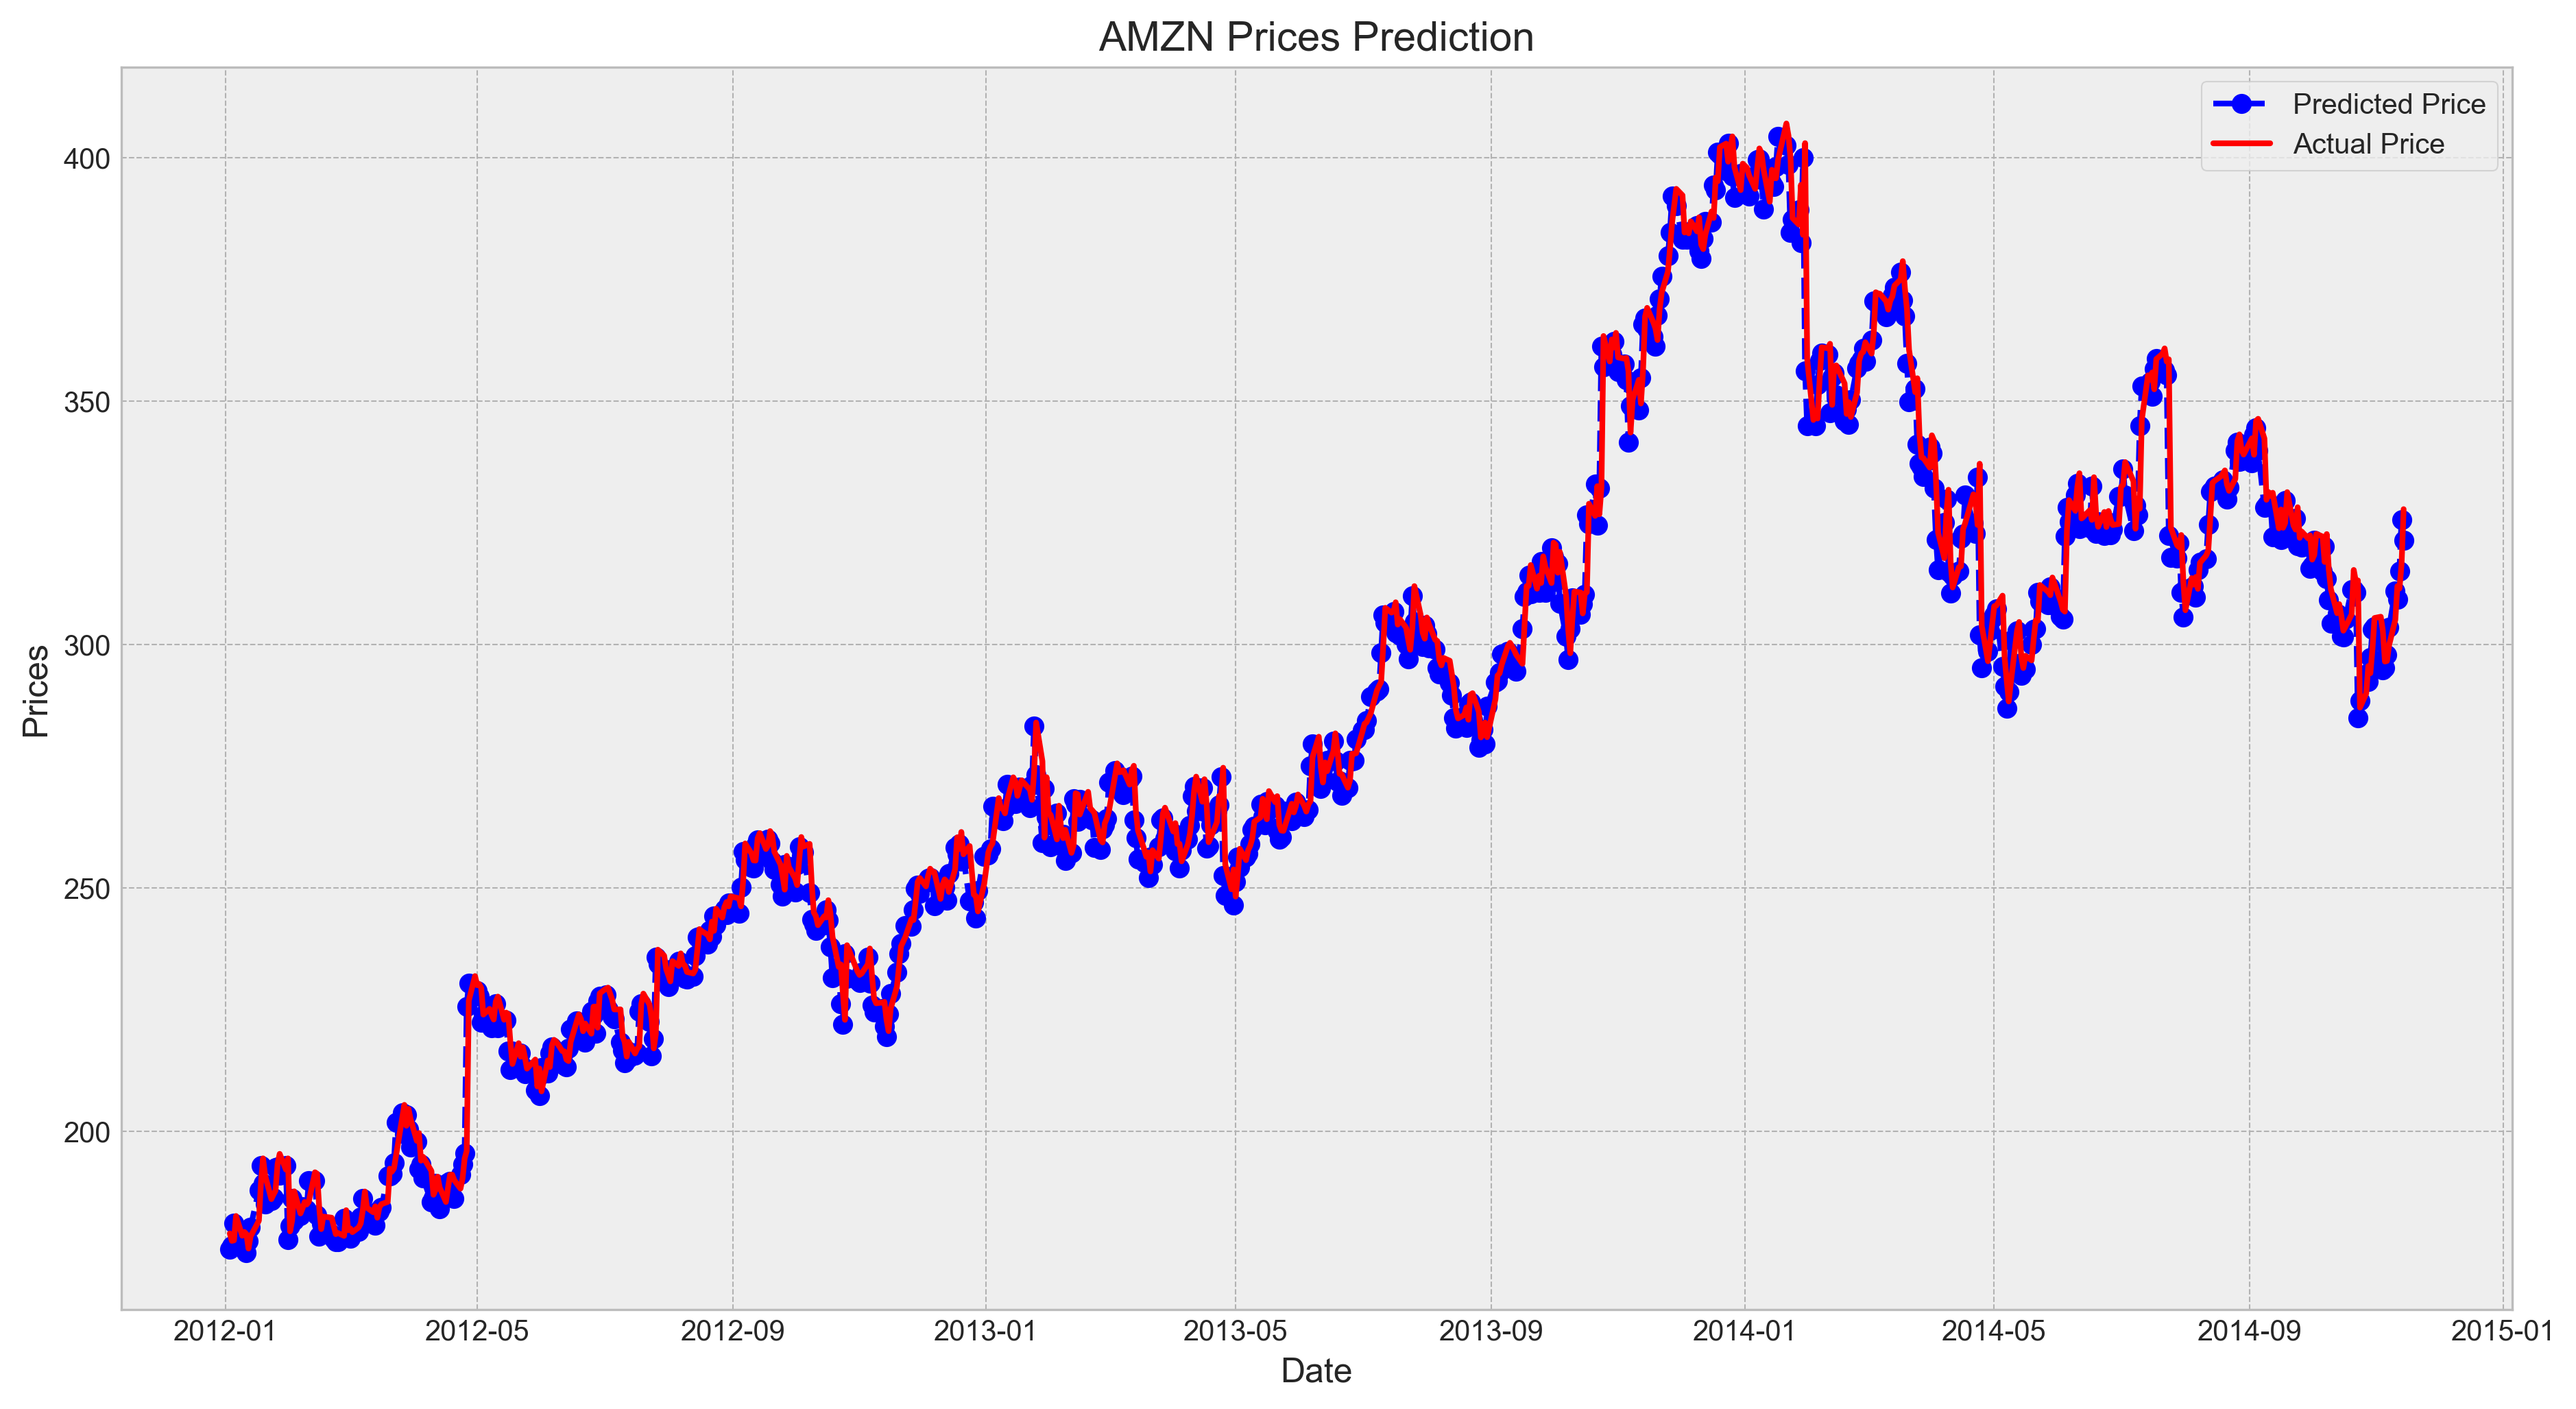

In [55]:
test_set_range = AMZN[int(len(AMZN)*0.7):].index
plt.figure(figsize=(15, 8))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('AMZN Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

## 5b. LSTM Predictions on AMZN stock, starting at Jan 1, 2012

In [36]:
AMZN = pdr.DataReader('AMZN', data_source='stooq', start='2012-01-01', end="2021-07-30")

In [37]:
training_set, test_set = AMZN[int(len(AMZN)*0.3):], AMZN[:int(len(AMZN)*0.3)]
print(len(training_set))
print(len(test_set))

1687
723


In [38]:
data = AMZN.filter(['Close'])
dataset = data.values
# 70 train
training_data_len = int(np.ceil( len(dataset) * .7 ))
training_data_len

1687

Scaling stock prices is likely incorrect, since there's no upper or lower bound. However, for a NN, I would need to scale them in order for them to fit into the LSTM architecture. 

In [39]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler(feature_range=(0,1))
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

### Using a 2 year sliding window to predict the next timestep (506 trading days = 2 years)

In [40]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(506, len(train_data)):
    x_train.append(train_data[i-506:i, 0])
    y_train.append(train_data[i, 0])
# print(len(x_train))
# print(len(y_train))
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [41]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
# Decreasing to 64 here has helped with underfitting.
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=16, epochs=15)

Epoch 1/15
74/74 [==============================] - 58s 711ms/step - loss: 0.0456
Epoch 2/15
74/74 [==============================] - 56s 751ms/step - loss: 0.0057
Epoch 3/15
74/74 [==============================] - 53s 713ms/step - loss: 0.0069
Epoch 4/15
74/74 [==============================] - 55s 742ms/step - loss: 0.0052
Epoch 5/15
74/74 [==============================] - 52s 697ms/step - loss: 0.0045
Epoch 6/15
74/74 [==============================] - 52s 701ms/step - loss: 0.0060
Epoch 7/15
74/74 [==============================] - 52s 705ms/step - loss: 0.0052
Epoch 8/15
74/74 [==============================] - 55s 746ms/step - loss: 0.0042
Epoch 9/15
74/74 [==============================] - 58s 788ms/step - loss: 0.0038
Epoch 10/15
74/74 [==============================] - 57s 766ms/step - loss: 0.0048
Epoch 11/15
74/74 [==============================] - 58s 776ms/step - loss: 0.0045
Epoch 12/15
74/74 [==============================] - 53s 722ms/step - loss: 0.0044
Epoch 13/15
7

In [42]:
test_data = scaled_data[training_data_len - 506: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(506, len(test_data)):
    x_test.append(test_data[i-506:i, 0])

# Convert to np array
x_test = np.array(x_test)

# Reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

MSE_error = mean_squared_error(y_test, predictions)
MSE_error

150.2847305065311

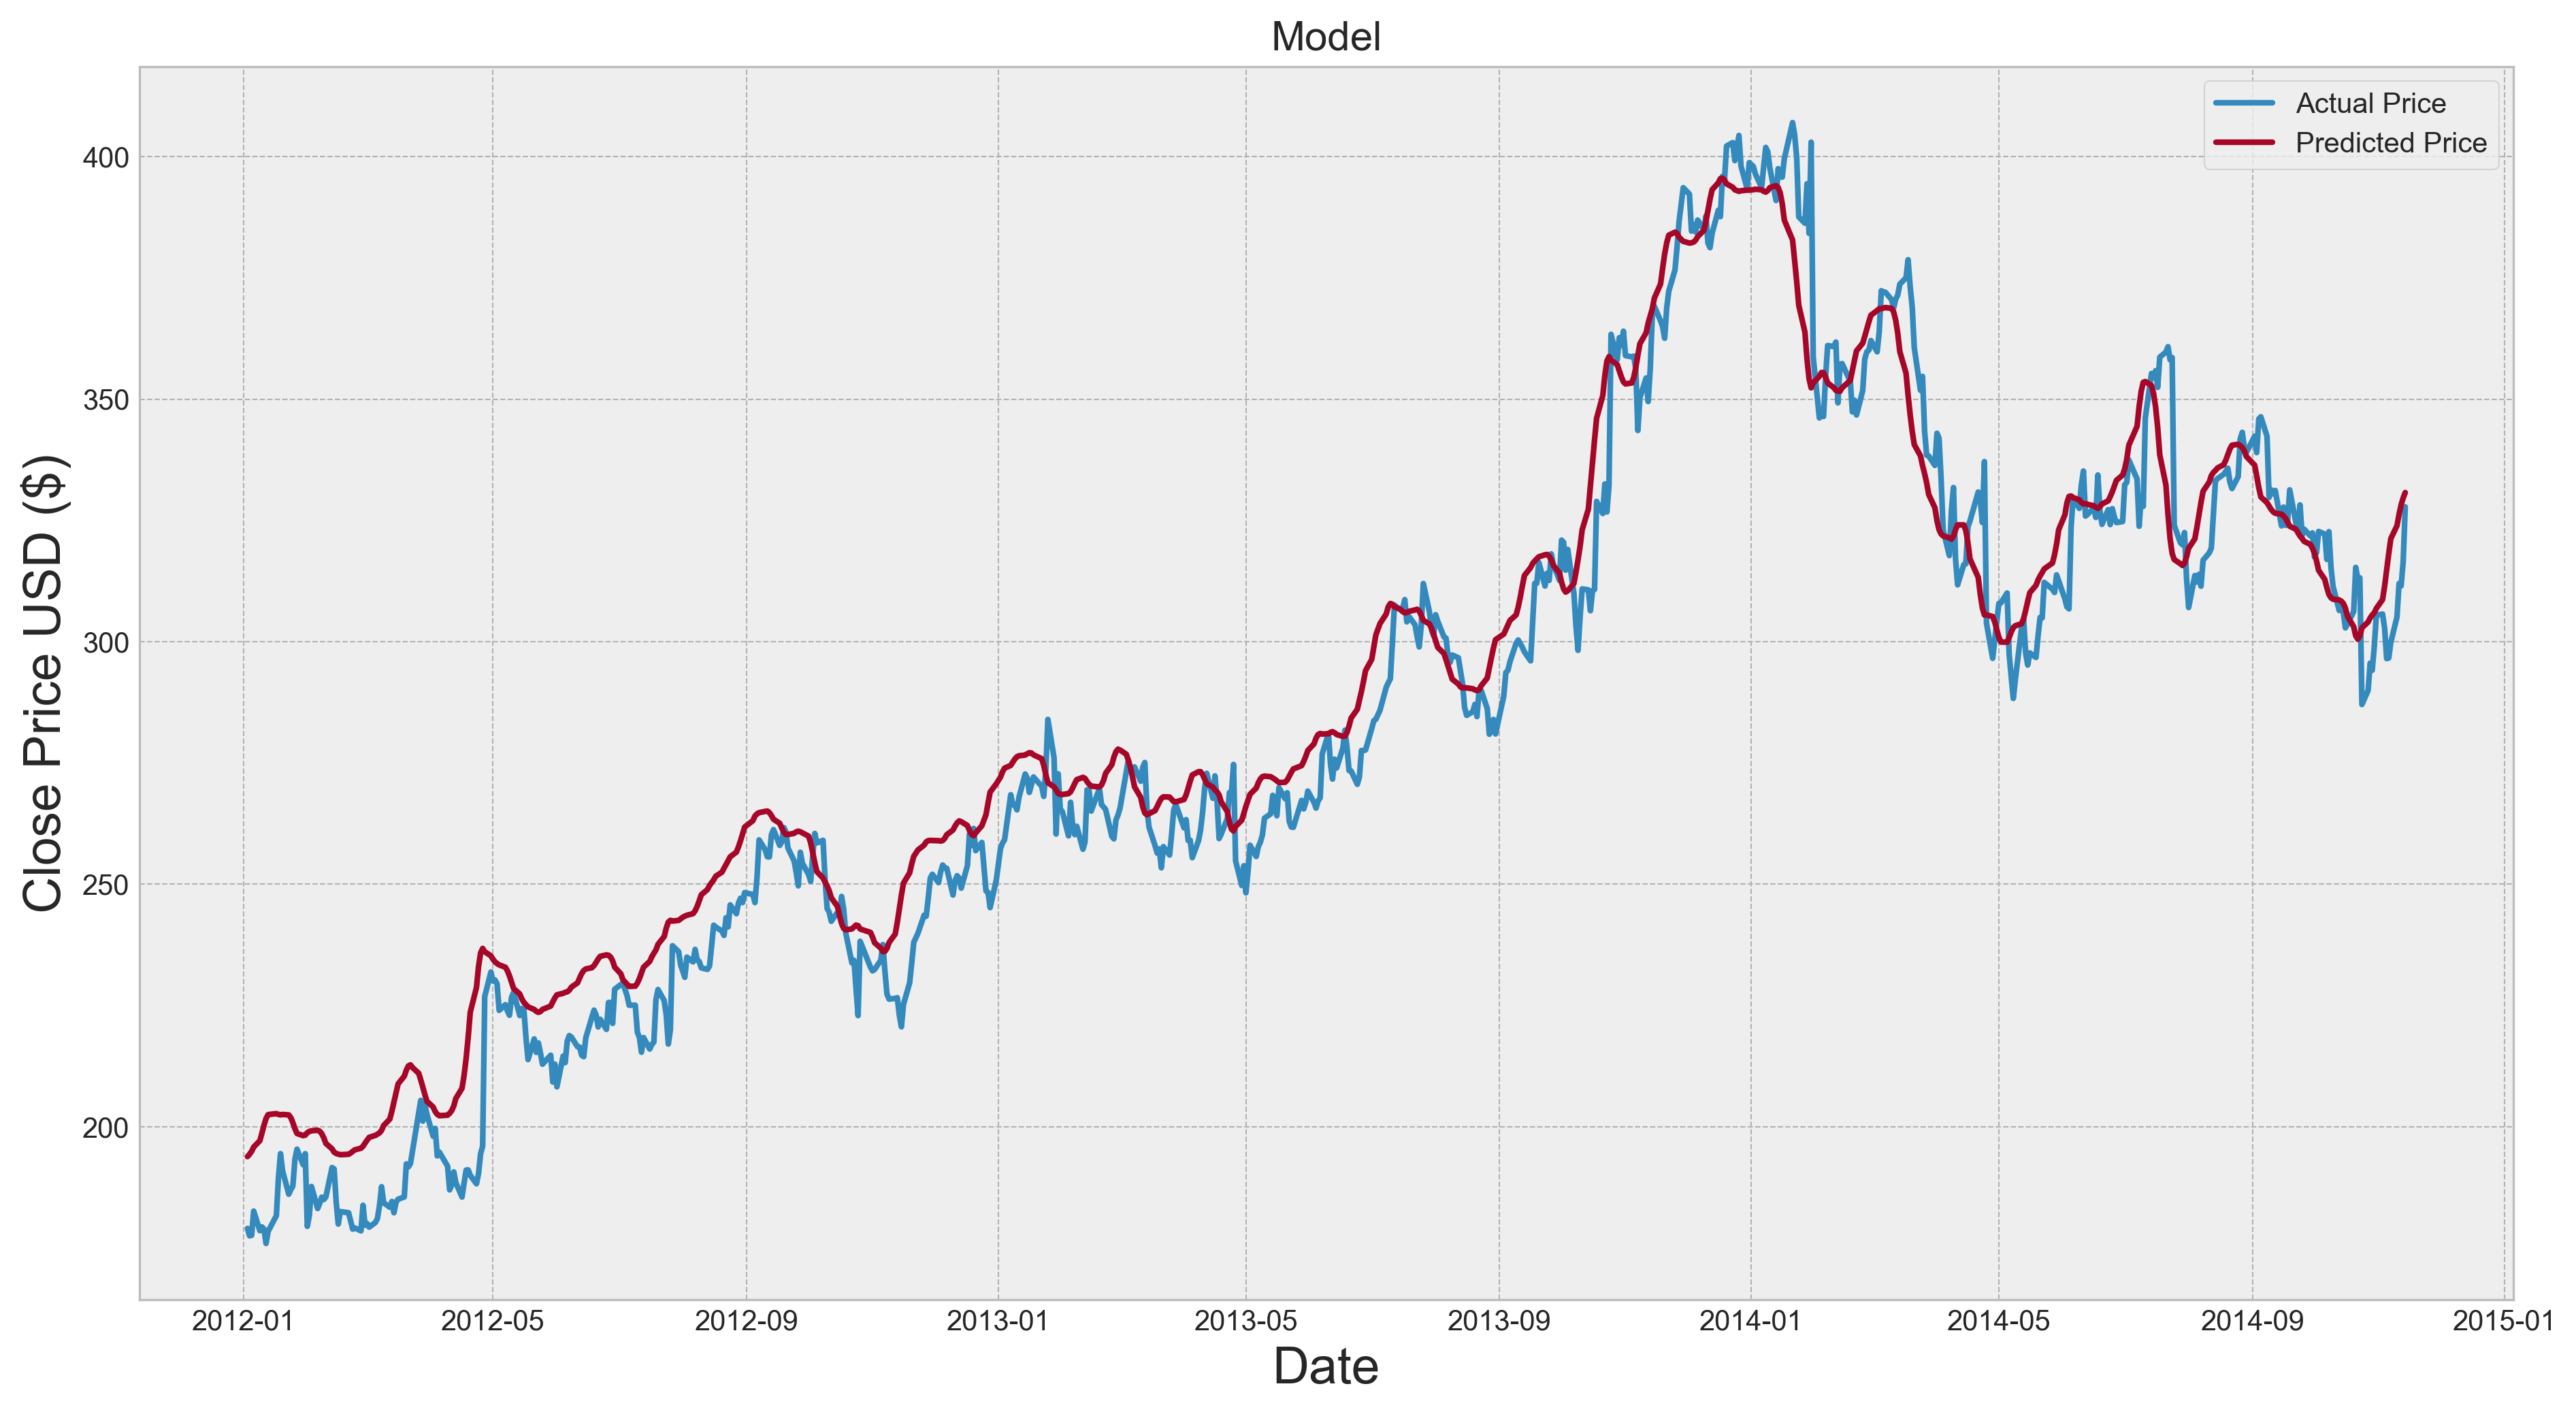

In [44]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(15,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Actual Price', 'Predicted Price'])
plt.show()

## 5c: Testing out Facebook's Prophet package

In [32]:
AMZN = AMZN.reset_index()
data = AMZN[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset

In [33]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True, seasonality_prior_scale=0.1) # the Prophet class (model)
m.fit(data) # fit the model using all data

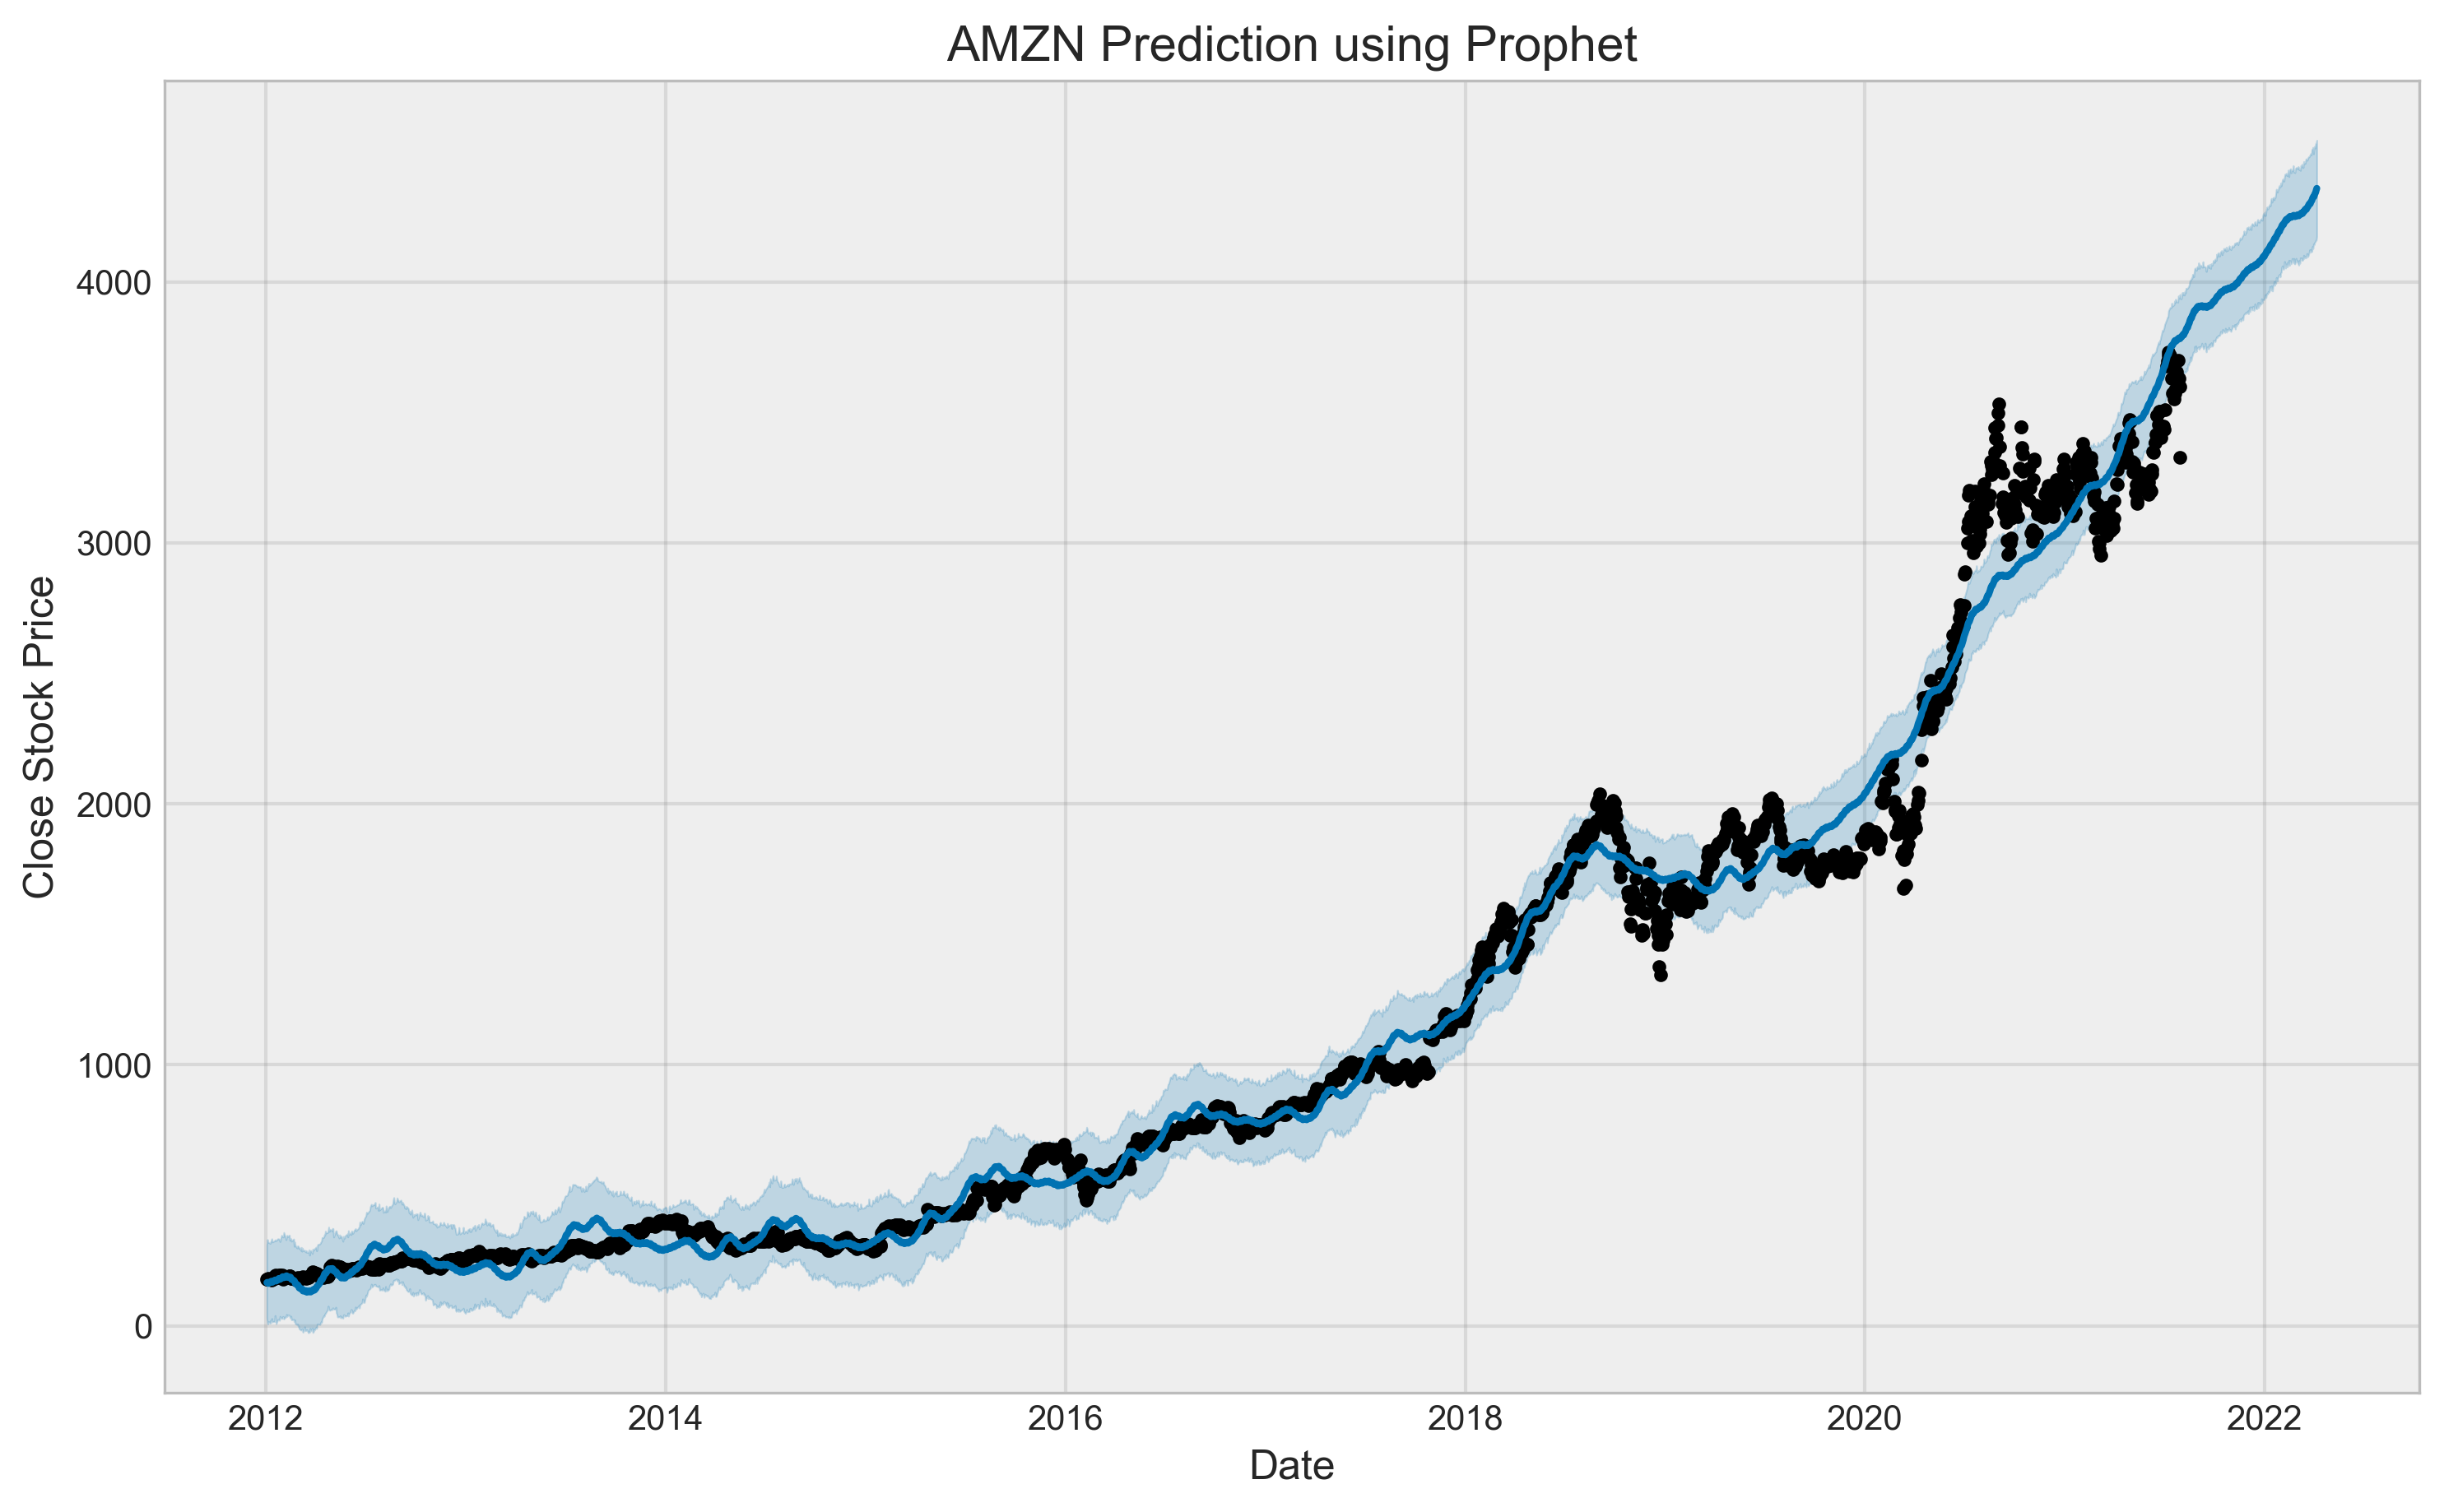

In [45]:
future = m.make_future_dataframe(periods=250) #1 year of trading prediction
prediction = m.predict(future)
m.plot(prediction)
plt.title("AMZN Prediction using Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

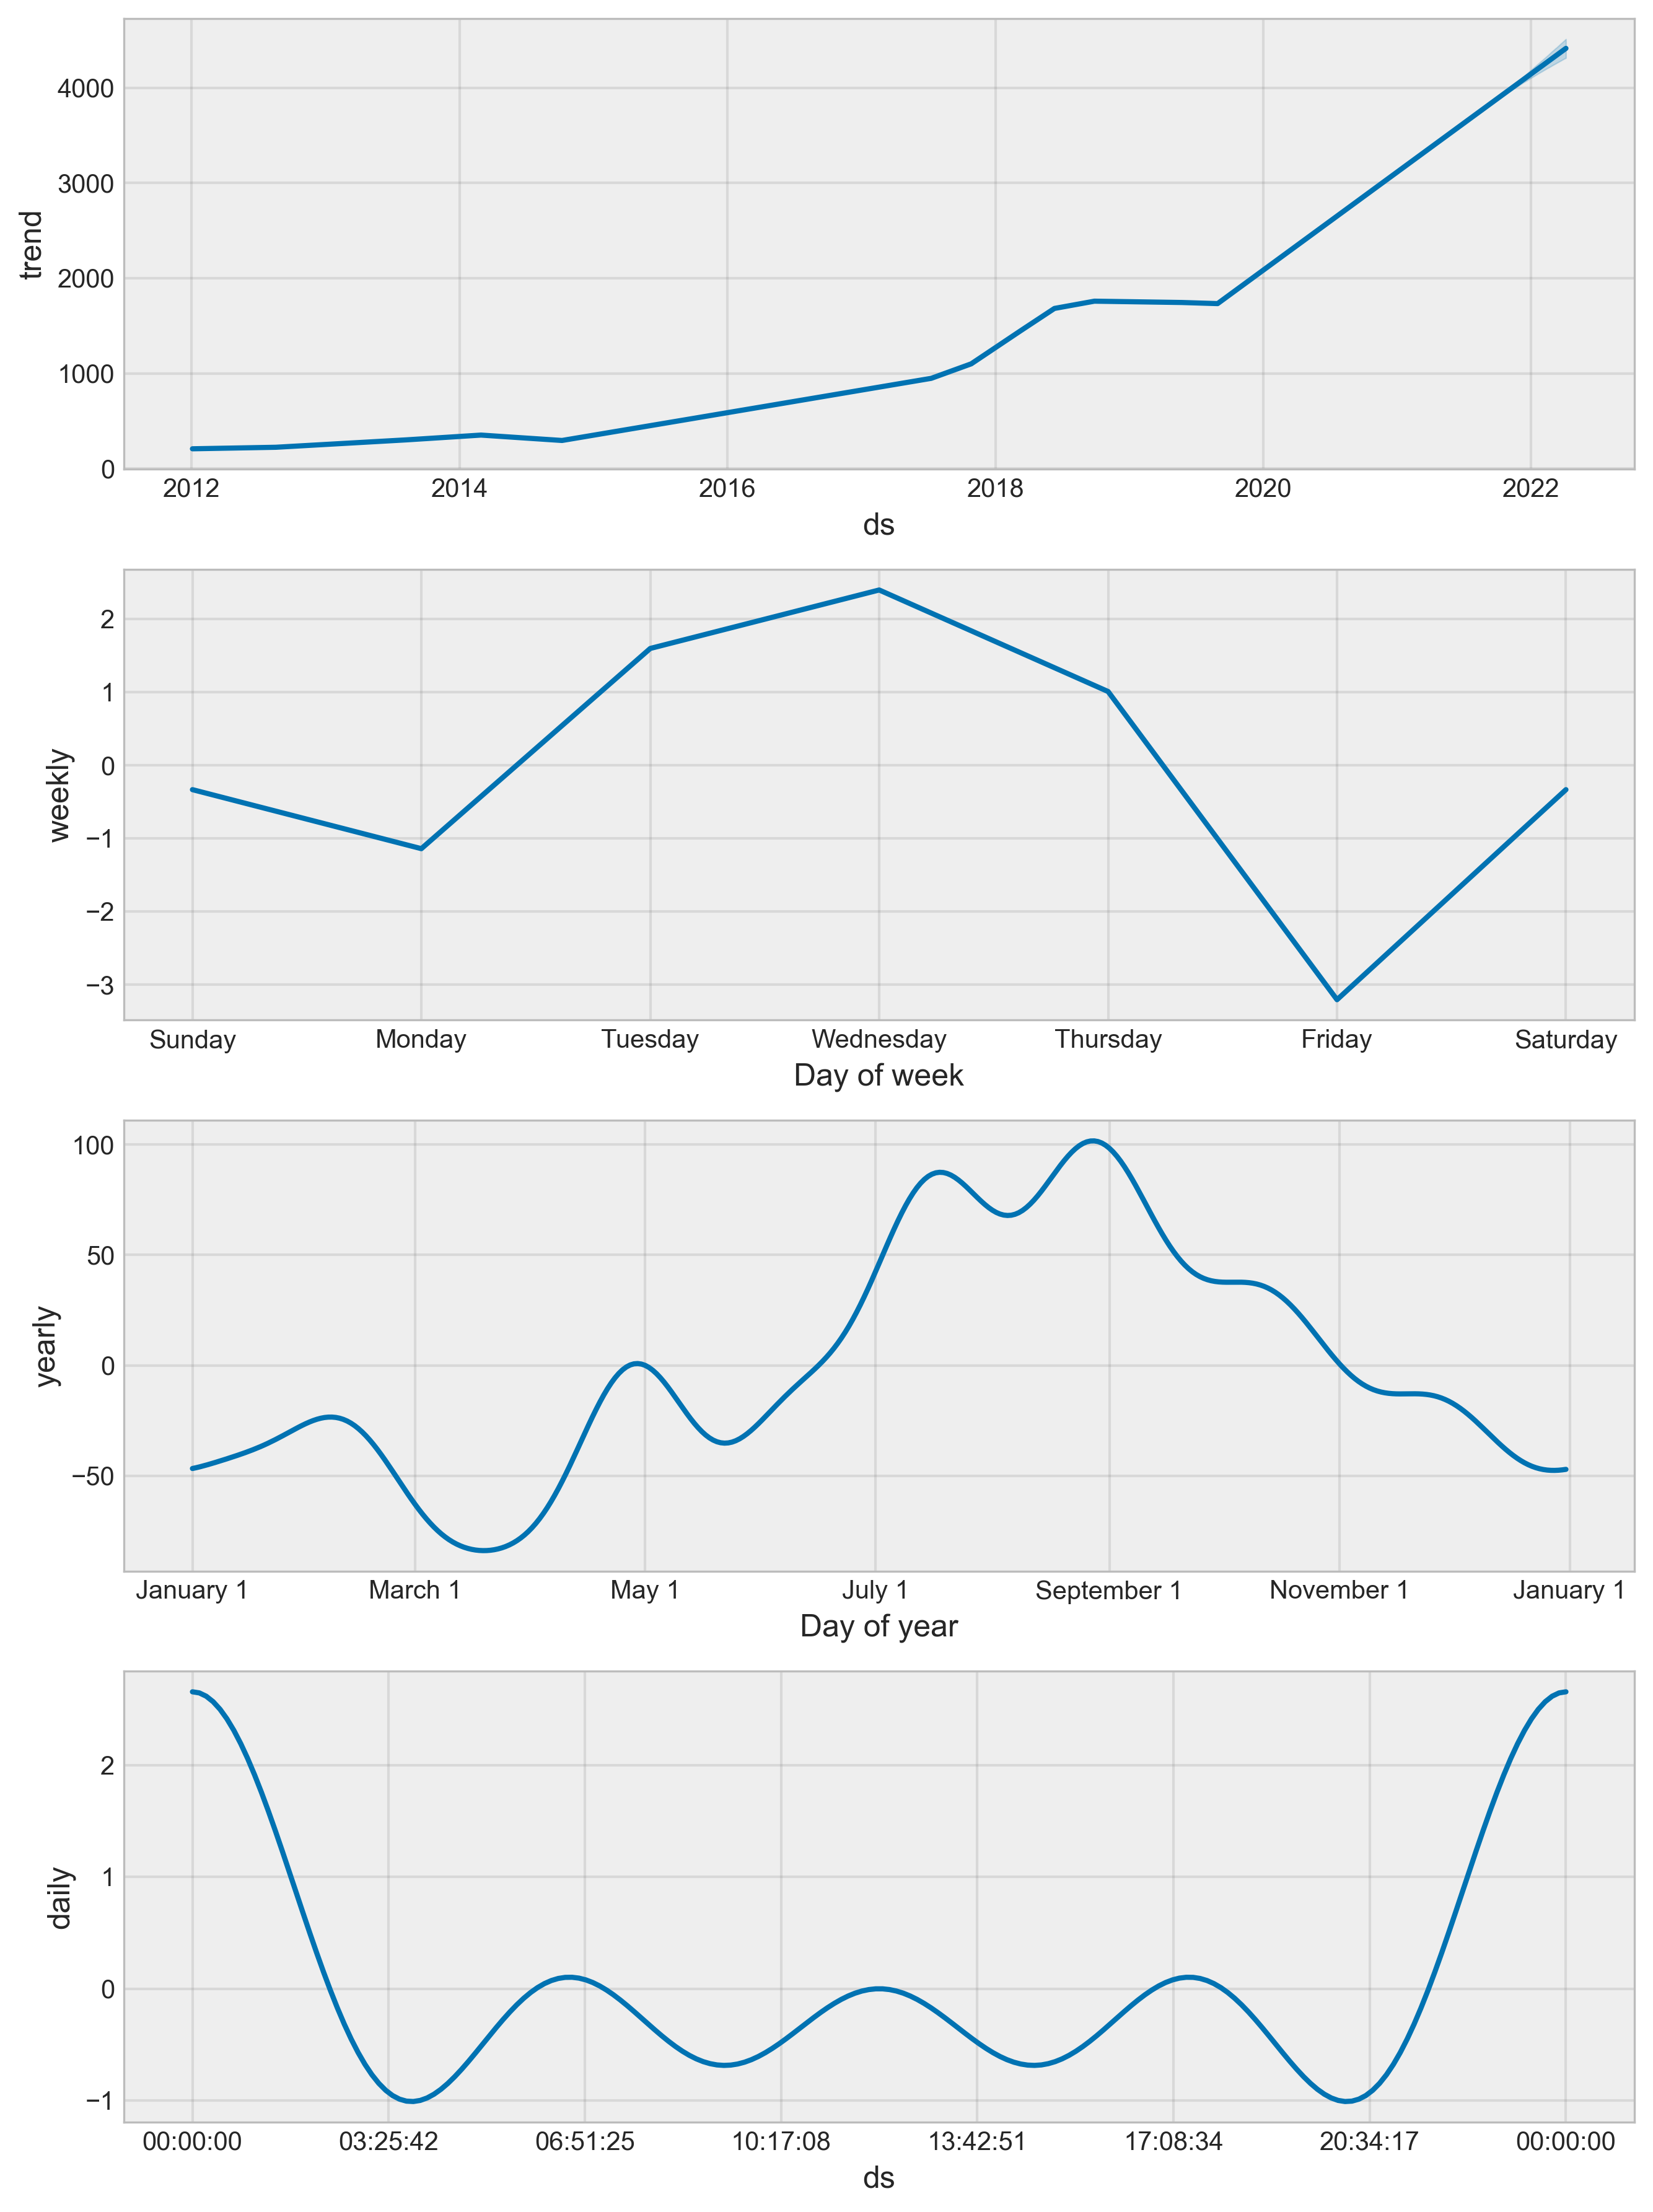

In [46]:
m.plot_components(prediction)
plt.show()